In [1]:
import requests, os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
base_url = "https://power.larc.nasa.gov/api/temporal/climatology/point?parameters=MAX_AVAIL_INSOL_CONSEC_MONTH&community=RE&longitude=15&latitude=59&format=JSON"

In [3]:
# regional?latitude-min=50&latitude-max=55&longitude-min=50&longitude-max=55

In [63]:
def get_insolation_data(longitute, latitude):
    # Returns in kWh/day (сколько точка имеет киловат-час за весь день)
    url = f"https://power.larc.nasa.gov/api/temporal/climatology/point?parameters=MIN_AVAIL_INSOL_CONSEC_MONTH,MAX_AVAIL_INSOL_CONSEC_MONTH&community=RE&longitude={longitute}&latitude={latitude}&format=JSON&start=2000&end=2022"
    response = requests.get(url)
    data = response.json()
    print(data)
    data = data["properties"]["parameter"]
    df = pd.DataFrame.from_dict(data, orient='index')
    df = df.drop(columns="ANN")
    df.rename(index={
        "MAX_AVAIL_INSOL_CONSEC_MONTH": "MAX",
        "MIN_AVAIL_INSOL_CONSEC_MONTH": "MIN",
    }, inplace=True)
    df = df.round().astype("int")
    df = df.T
    df["AVG"] = ((df["MAX"] + df["MIN"]) / 2).astype("int")
    return df

In [64]:
right_up_insolation = get_insolation_data(59.858762, 17.961747)
right_up_insolation

{'type': 'Feature', 'geometry': {'type': 'Point', 'coordinates': [59.858762, 17.961747, 0.0]}, 'properties': {'parameter': {'MAX_AVAIL_INSOL_CONSEC_MONTH': {'JAN': 166.41, 'FEB': 177.49, 'MAR': 221.37, 'APR': 223.87, 'MAY': 229.61, 'JUN': 192.63, 'JUL': 192.22, 'AUG': 178.97, 'SEP': 191.85, 'OCT': 195.51, 'NOV': 166.25, 'DEC': 156.83, 'ANN': -999.0}, 'MIN_AVAIL_INSOL_CONSEC_MONTH': {'JAN': 145.02, 'FEB': 160.64, 'MAR': 199.78, 'APR': 202.94, 'MAY': 202.81, 'JUN': 143.81, 'JUL': 136.48, 'AUG': 143.65, 'SEP': 150.61, 'OCT': 172.3, 'NOV': 134.43, 'DEC': 127.43, 'ANN': -999.0}}}, 'header': {'title': 'NASA/POWER CERES/MERRA2 Native Resolution Climatology Climatologies', 'api': {'version': 'v2.5.9', 'name': 'POWER Climatology API'}, 'sources': ['power'], 'fill_value': -999.0, 'range': '23-year Meteorological and Solar Monthly & Annual Climatologies (January 2000 - December 2022)'}, 'messages': ['The Battery Sizing parameters are computed for January 2001 to December 2020 not a custom climato

,MAX,MIN,AVG
JAN,166,145,155
FEB,177,161,169
MAR,221,200,210
APR,224,203,213
MAY,230,203,216
JUN,193,144,168
JUL,192,136,164
AUG,179,144,161
SEP,192,151,171
OCT,196,172,184


In [65]:
left_up_insolation = get_insolation_data(58.079281, 13.314153)
left_up_insolation

{'type': 'Feature', 'geometry': {'type': 'Point', 'coordinates': [58.079281, 13.314153, 0.0]}, 'properties': {'parameter': {'MAX_AVAIL_INSOL_CONSEC_MONTH': {'JAN': 176.11, 'FEB': 182.32, 'MAR': 223.43, 'APR': 221.03, 'MAY': 222.07, 'JUN': 181.16, 'JUL': 198.27, 'AUG': 208.72, 'SEP': 195.19, 'OCT': 196.71, 'NOV': 169.4, 'DEC': 162.3, 'ANN': -999.0}, 'MIN_AVAIL_INSOL_CONSEC_MONTH': {'JAN': 155.41, 'FEB': 166.93, 'MAR': 203.89, 'APR': 208.17, 'MAY': 180.02, 'JUN': 153.48, 'JUL': 167.99, 'AUG': 158.27, 'SEP': 167.0, 'OCT': 161.93, 'NOV': 138.14, 'DEC': 132.92, 'ANN': -999.0}}}, 'header': {'title': 'NASA/POWER CERES/MERRA2 Native Resolution Climatology Climatologies', 'api': {'version': 'v2.5.9', 'name': 'POWER Climatology API'}, 'sources': ['power'], 'fill_value': -999.0, 'range': '23-year Meteorological and Solar Monthly & Annual Climatologies (January 2000 - December 2022)'}, 'messages': ['The Battery Sizing parameters are computed for January 2001 to December 2020 not a custom climatolo

,MAX,MIN,AVG
JAN,176,155,165
FEB,182,167,174
MAR,223,204,213
APR,221,208,214
MAY,222,180,201
JUN,181,153,167
JUL,198,168,183
AUG,209,158,183
SEP,195,167,181
OCT,197,162,179


In [66]:
right_down_insolation = get_insolation_data(56.256998, 15.364758)
right_down_insolation

{'type': 'Feature', 'geometry': {'type': 'Point', 'coordinates': [56.256998, 15.364758, 0.0]}, 'properties': {'parameter': {'MAX_AVAIL_INSOL_CONSEC_MONTH': {'JAN': 174.35, 'FEB': 179.88, 'MAR': 222.86, 'APR': 220.29, 'MAY': 226.08, 'JUN': 193.62, 'JUL': 198.37, 'AUG': 207.52, 'SEP': 199.55, 'OCT': 197.65, 'NOV': 171.7, 'DEC': 167.13, 'ANN': -999.0}, 'MIN_AVAIL_INSOL_CONSEC_MONTH': {'JAN': 153.93, 'FEB': 165.14, 'MAR': 200.27, 'APR': 202.77, 'MAY': 193.45, 'JUN': 162.99, 'JUL': 170.42, 'AUG': 175.89, 'SEP': 175.51, 'OCT': 172.92, 'NOV': 142.89, 'DEC': 133.6, 'ANN': -999.0}}}, 'header': {'title': 'NASA/POWER CERES/MERRA2 Native Resolution Climatology Climatologies', 'api': {'version': 'v2.5.9', 'name': 'POWER Climatology API'}, 'sources': ['power'], 'fill_value': -999.0, 'range': '23-year Meteorological and Solar Monthly & Annual Climatologies (January 2000 - December 2022)'}, 'messages': ['The Battery Sizing parameters are computed for January 2001 to December 2020 not a custom climatol

,MAX,MIN,AVG
JAN,174,154,164
FEB,180,165,172
MAR,223,200,211
APR,220,203,211
MAY,226,193,209
JUN,194,163,178
JUL,198,170,184
AUG,208,176,192
SEP,200,176,188
OCT,198,173,185


In [67]:
left_down_insolation = get_insolation_data(56.180763, 13.277881)
left_down_insolation

{'type': 'Feature', 'geometry': {'type': 'Point', 'coordinates': [56.180763, 13.277881, 0.0]}, 'properties': {'parameter': {'MAX_AVAIL_INSOL_CONSEC_MONTH': {'JAN': 177.14, 'FEB': 182.33, 'MAR': 224.18, 'APR': 219.65, 'MAY': 222.39, 'JUN': 191.26, 'JUL': 196.29, 'AUG': 211.43, 'SEP': 201.85, 'OCT': 197.35, 'NOV': 173.8, 'DEC': 168.16, 'ANN': -999.0}, 'MIN_AVAIL_INSOL_CONSEC_MONTH': {'JAN': 160.29, 'FEB': 167.6, 'MAR': 204.22, 'APR': 205.78, 'MAY': 184.1, 'JUN': 158.64, 'JUL': 170.7, 'AUG': 173.87, 'SEP': 177.15, 'OCT': 167.77, 'NOV': 147.92, 'DEC': 136.1, 'ANN': -999.0}}}, 'header': {'title': 'NASA/POWER CERES/MERRA2 Native Resolution Climatology Climatologies', 'api': {'version': 'v2.5.9', 'name': 'POWER Climatology API'}, 'sources': ['power'], 'fill_value': -999.0, 'range': '23-year Meteorological and Solar Monthly & Annual Climatologies (January 2000 - December 2022)'}, 'messages': ['The Battery Sizing parameters are computed for January 2001 to December 2020 not a custom climatologi

,MAX,MIN,AVG
JAN,177,160,168
FEB,182,168,175
MAR,224,204,214
APR,220,206,213
MAY,222,184,203
JUN,191,159,175
JUL,196,171,183
AUG,211,174,192
SEP,202,177,189
OCT,197,168,182


In [57]:
left_down_insolation_avg = left_down_insolation[["AVG"]].copy()
left_down_insolation_avg = left_down_insolation_avg.reset_index()
left_down_insolation_avg.rename(columns={"index": "Month", "AVG": "Day Insolation (AVG)"}, inplace=True)
left_down_insolation_avg

,Month,Day Insolation (AVG)
0,JAN,168
1,FEB,175
2,MAR,214
3,APR,213
4,MAY,203
5,JUN,175
6,JUL,183
7,AUG,192
8,SEP,189
9,OCT,182


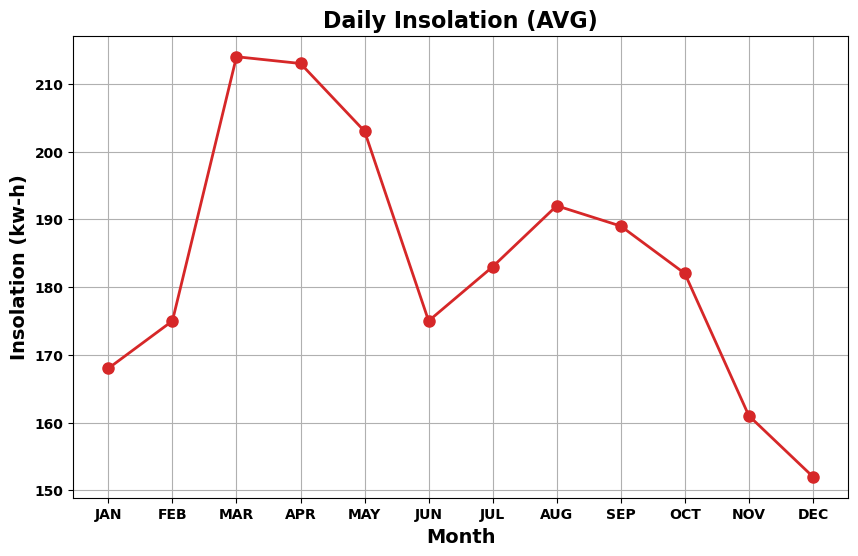

In [68]:
plt.figure(figsize=(10, 6))
plt.plot(left_down_insolation_avg['Month'], left_down_insolation_avg['Day Insolation (AVG)'], marker='o', color='tab:red', linewidth=2, markersize=8)

# Добавление заголовка и меток осей
plt.title('Daily Insolation (AVG)', fontsize=16)
plt.xlabel('Month',fontsize=14)
plt.ylabel('Insolation (kw-h)', fontsize=14)

# Показать график
plt.grid(True)
plt.savefig('daily_insolation.png')
plt.show()

In [9]:
avg_days_in_month = 30.41
right_up_insolation_avg_sum = round((right_up_insolation["AVG"] * avg_days_in_month).sum())
left_up_insolation_avg_sum = round((left_up_insolation["AVG"] * avg_days_in_month).sum())
right_down_insolation_avg_sum = round((right_down_insolation["AVG"] * avg_days_in_month).sum())
left_down_insolation_avg_sum = round((left_down_insolation["AVG"] * avg_days_in_month).sum())

In [10]:
right_up_insolation_avg_sum

63952

In [11]:
left_up_insolation_avg_sum

65686

In [12]:
right_down_insolation_avg_sum

66932

In [13]:
left_down_insolation_avg_sum

67115

In [14]:
url = "https://power.larc.nasa.gov/api/temporal/climatology/point?parameters=SI_EF_MAX_TILTED_SURFACE&community=RE&longitude=56.180763&latitude=13.277881&format=JSON&start=2000&end=2022"
response = requests.get(url)
data = response.json()
data

{'type': 'Feature',
 'geometry': {'type': 'Point', 'coordinates': [56.180763, 13.277881, 0.0]},
 'properties': {'parameter': {'SI_EF_MAX_TILTED_SURFACE_HORIZONTAL': {'JAN': 6.3,
    'FEB': 7.14,
    'MAR': 7.62,
    'APR': 7.66,
    'MAY': 7.57,
    'JUN': 7.07,
    'JUL': 7.01,
    'AUG': 7.2,
    'SEP': 7.12,
    'OCT': 7.13,
    'NOV': 6.47,
    'DEC': 5.98,
    'ANN': -999.0},
   'SI_EF_MAX_TILTED_SURFACE_LAT_MINUS15': {'JAN': 6.18,
    'FEB': 7.04,
    'MAR': 7.56,
    'APR': 7.66,
    'MAY': 7.61,
    'JUN': 7.11,
    'JUL': 7.04,
    'AUG': 7.21,
    'SEP': 7.09,
    'OCT': 7.05,
    'NOV': 6.35,
    'DEC': 5.85,
    'ANN': -999.0},
   'SI_EF_MAX_TILTED_SURFACE_LATITUDE': {'JAN': 7.27,
    'FEB': 7.83,
    'MAR': 7.89,
    'APR': 7.47,
    'MAY': 7.02,
    'JUN': 6.45,
    'JUL': 6.48,
    'AUG': 6.89,
    'SEP': 7.16,
    'OCT': 7.63,
    'NOV': 7.34,
    'DEC': 7.0,
    'ANN': -999.0},
   'SI_EF_MAX_TILTED_SURFACE_LAT_PLUS15': {'JAN': 7.9,
    'FEB': 8.14,
    'MAR': 7.71,
   

In [15]:
url = "https://power.larc.nasa.gov/api/temporal/climatology/point?parameters=CLOUD_AMT,CLRSKY_DAYS&community=RE&longitude=56.180763&latitude=13.277881&format=JSON&start=2000&end=2022"
response = requests.get(url)
data = response.json()
data

{'type': 'Feature',
 'geometry': {'type': 'Point', 'coordinates': [56.180763, 13.277881, 0.0]},
 'properties': {'parameter': {'CLOUD_AMT': {'JAN': 37.14,
    'FEB': 30.18,
    'MAR': 22.14,
    'APR': 21.82,
    'MAY': 39.64,
    'JUN': 61.36,
    'JUL': 58.36,
    'AUG': 45.47,
    'SEP': 41.84,
    'OCT': 35.38,
    'NOV': 34.56,
    'DEC': 39.48,
    'ANN': 39.01},
   'CLRSKY_DAYS': {'JAN': 4.39,
    'FEB': 7.52,
    'MAR': 15.78,
    'APR': 15.83,
    'MAY': 8.17,
    'JUN': 1.17,
    'JUL': 1.57,
    'AUG': 4.87,
    'SEP': 3.61,
    'OCT': 7.22,
    'NOV': 7.74,
    'DEC': 3.57,
    'ANN': 81.43}}},
 'header': {'title': 'NASA/POWER CERES/MERRA2 Native Resolution Climatology Climatologies',
  'api': {'version': 'v2.5.9', 'name': 'POWER Climatology API'},
  'sources': ['power', 'srb', 'syn1deg'],
  'fill_value': -999.0,
  'range': '23-year Meteorological and Solar Monthly & Annual Climatologies (January 2000 - December 2022)'},
 'messages': [],
 'parameters': {'CLOUD_AMT': {'units'

In [16]:
cloud_data = data['properties']['parameter']['CLOUD_AMT']
clear_sky_data = data['properties']['parameter']['CLRSKY_DAYS']

df_cloud = pd.DataFrame.from_dict(cloud_data, orient='index', columns=['Cloud Amount'])
df_clear_sky = pd.DataFrame.from_dict(clear_sky_data, orient='index', columns=['Clear Sky Days'])

df = pd.concat([df_cloud, df_clear_sky], axis=1)

In [17]:
df

,Cloud Amount,Clear Sky Days
JAN,37.14,4.39
FEB,30.18,7.52
MAR,22.14,15.78
APR,21.82,15.83
MAY,39.64,8.17
JUN,61.36,1.17
JUL,58.36,1.57
AUG,45.47,4.87
SEP,41.84,3.61
OCT,35.38,7.22


In [18]:
df.rename(index={'JAN': 'January', 'FEB': 'February', 'MAR': 'March', 
                                   'APR': 'April', 'MAY': 'May', 'JUN': 'June', 
                                   'JUL': 'July', 'AUG': 'August', 'SEP': 'September', 
                                   'OCT': 'October', 'NOV': 'November', 'DEC': 'December', "ANN": "Annual"}, inplace=True)
df.rename(columns={"Cloud Amount" : "Cloud Amount %"}, inplace=True)
df["Clear Sky Days"] = df["Clear Sky Days"].round().astype("int")
df["Cloud Amount %"] = df["Cloud Amount %"].round().astype("int")
df

,Cloud Amount %,Clear Sky Days
January,37,4
February,30,8
March,22,16
April,22,16
May,40,8
June,61,1
July,58,2
August,45,5
September,42,4
October,35,7


In [19]:
df_for_table = df.reset_index().copy()

In [20]:
df_for_table = df_for_table.rename(columns={"index": "Month"})
df_for_table["Cloud Amount %"] = (df_for_table["Cloud Amount %"])
df_for_table

,Month,Cloud Amount %,Clear Sky Days
0,January,37,4
1,February,30,8
2,March,22,16
3,April,22,16
4,May,40,8
5,June,61,1
6,July,58,2
7,August,45,5
8,September,42,4
9,October,35,7


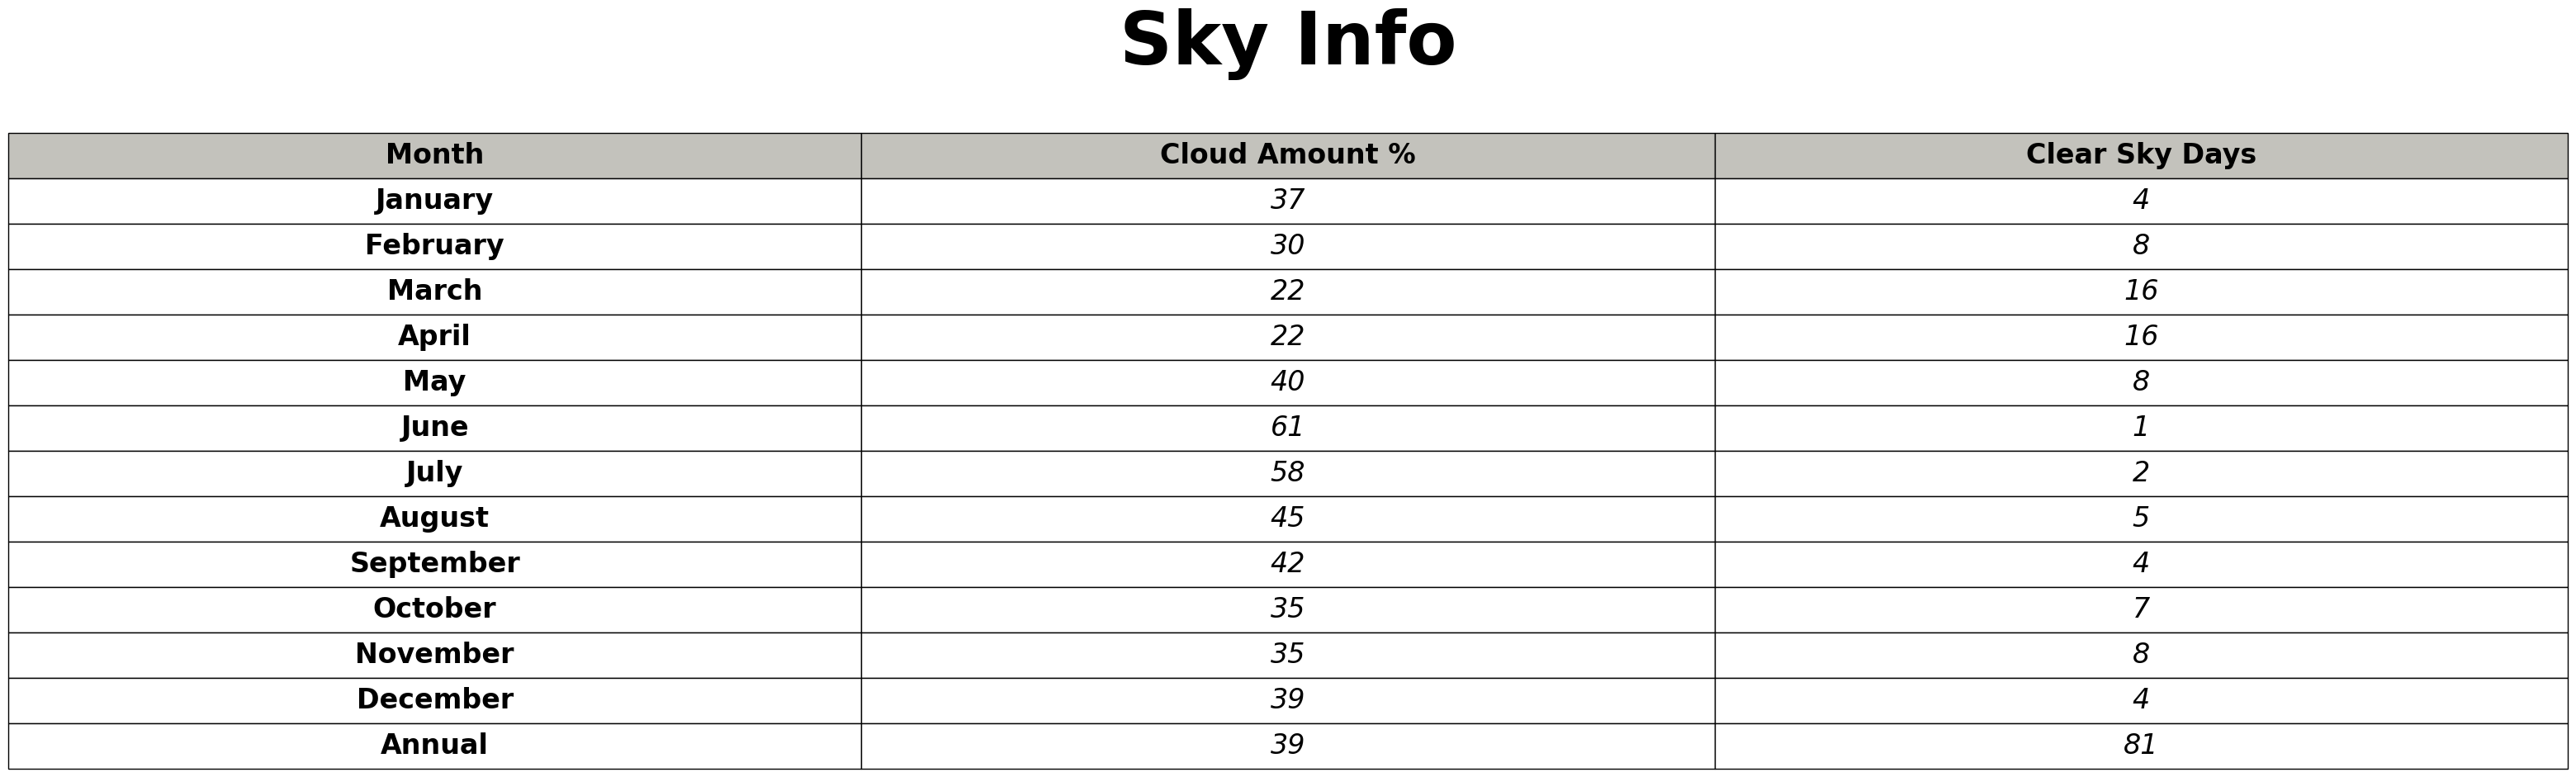

In [21]:
fig, ax = plt.subplots(figsize=(40, 10))

data = df_for_table.values.tolist()

table = ax.table(cellText=data,
                 loc='center',
                 colLabels=df_for_table.columns,
                 bbox=[0, 0, 1, 1],
                 cellLoc='center',
                 colColours =["#C3C2BC"] * 10,
                )

for (i, j), cell in table.get_celld().items():
    if i == 0 or j == 0:
        cell.set_text_props(fontweight="bold")
    else:
        cell.set_text_props(fontstyle="italic")

ax.set_title('Sky Info', 
             fontweight="bold",
             fontsize="64",
             pad=60
            ) 

table.auto_set_font_size(False)
table.set_fontsize(24)
table.scale(2, 2)

ax.axis('off')

#plt.savefig('rovers_info_table.png', bbox_inches='tight', pad_inches=0.5)
plt.show()

In [22]:
df_for_vis = df_for_table

In [23]:
df_for_vis

,Month,Cloud Amount %,Clear Sky Days
0,January,37,4
1,February,30,8
2,March,22,16
3,April,22,16
4,May,40,8
5,June,61,1
6,July,58,2
7,August,45,5
8,September,42,4
9,October,35,7


In [24]:
df_for_vis.index = df_for_vis["Month"]
df_for_vis = df_for_vis.drop(columns=["Month"])

In [25]:
df_for_vis = df_for_vis.drop("Annual", axis=0)
df_for_vis

,Cloud Amount %,Clear Sky Days
Month,,
January,37,4
February,30,8
March,22,16
April,22,16
May,40,8
June,61,1
July,58,2
August,45,5
September,42,4


In [26]:
df_for_vis.index = df_for_vis.index.str.slice(0, 3)
df_for_vis

,Cloud Amount %,Clear Sky Days
Month,,
Jan,37,4
Feb,30,8
Mar,22,16
Apr,22,16
May,40,8
Jun,61,1
Jul,58,2
Aug,45,5
Sep,42,4


In [33]:
clear_sky = df_for_vis[["Clear Sky Days"]]
clear_sky = clear_sky.reset_index()
clear_sky

,Month,Clear Sky Days
0,Jan,4
1,Feb,8
2,Mar,16
3,Apr,16
4,May,8
5,Jun,1
6,Jul,2
7,Aug,5
8,Sep,4
9,Oct,7


In [28]:
cloud_amount = df_for_vis[["Cloud Amount %"]]
cloud_amount = cloud_amount.reset_index()
cloud_amount

,Month,Cloud Amount %
0,Jan,37
1,Feb,30
2,Mar,22
3,Apr,22
4,May,40
5,Jun,61
6,Jul,58
7,Aug,45
8,Sep,42
9,Oct,35


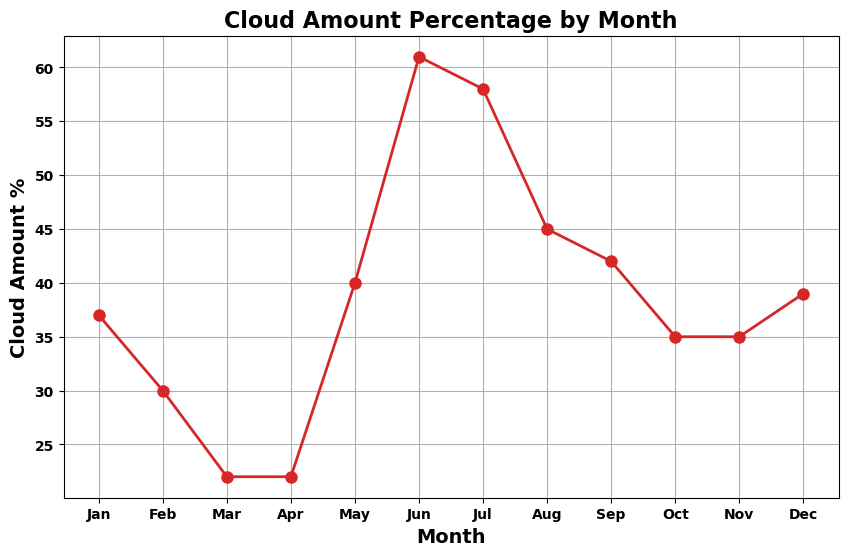

In [44]:
plt.figure(figsize=(10, 6))
plt.plot(cloud_amount['Month'], cloud_amount['Cloud Amount %'], marker='o', color='tab:red', linewidth=2, markersize=8)

# Добавление заголовка и меток осей
plt.title('Cloud Amount Percentage by Month', fontsize=16)
plt.xlabel('Month',fontsize=14)
plt.ylabel('Cloud Amount %', fontsize=14)

# Показать график
plt.grid(True)
plt.savefig('cloud_amount.png')
plt.show()

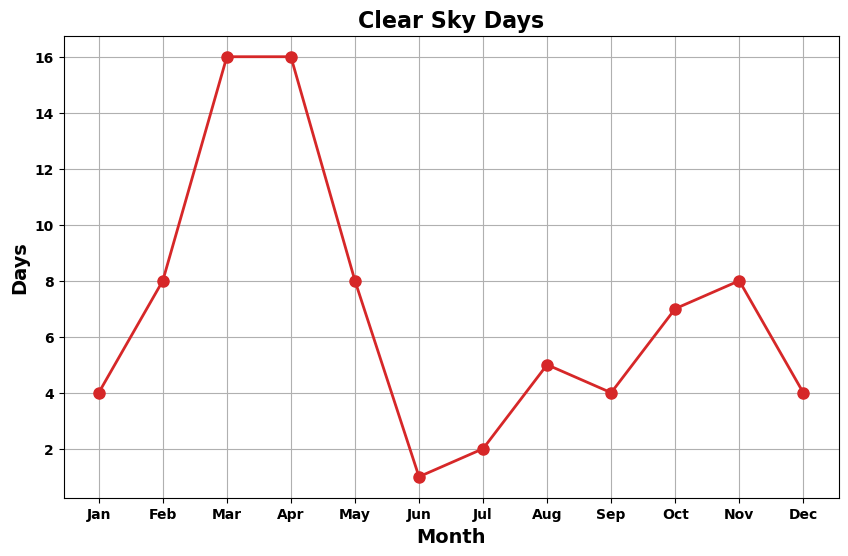

In [45]:
plt.figure(figsize=(10, 6))
plt.plot(clear_sky['Month'], clear_sky['Clear Sky Days'], marker='o', color='tab:red', linewidth=2, markersize=8)

# Добавление заголовка и меток осей
plt.title('Clear Sky Days', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Days', fontsize=14)

# Показать график
plt.grid(True)
plt.savefig('clear_sky_days.png')
plt.show()